<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Financial Data Preprocessing </h2> </html>

### Financial data of GOLD during 2022

### High & Low prices are outputs
- Data preprocessing done
- Spreads of all prices (Open, High, Low, Close) between Ask and Bid are calculated
- Delta of trading volumes (as well as the modulus of this delta) between Ask and Bid volumes
are introduced as additional parameters
 - Starts of each trading day and each trading week are marked


- normalization parameters are calculated only for the training part (80%) of the Dataset (so as not to peep into the future)

#### Number of rows
- 354.694 rows



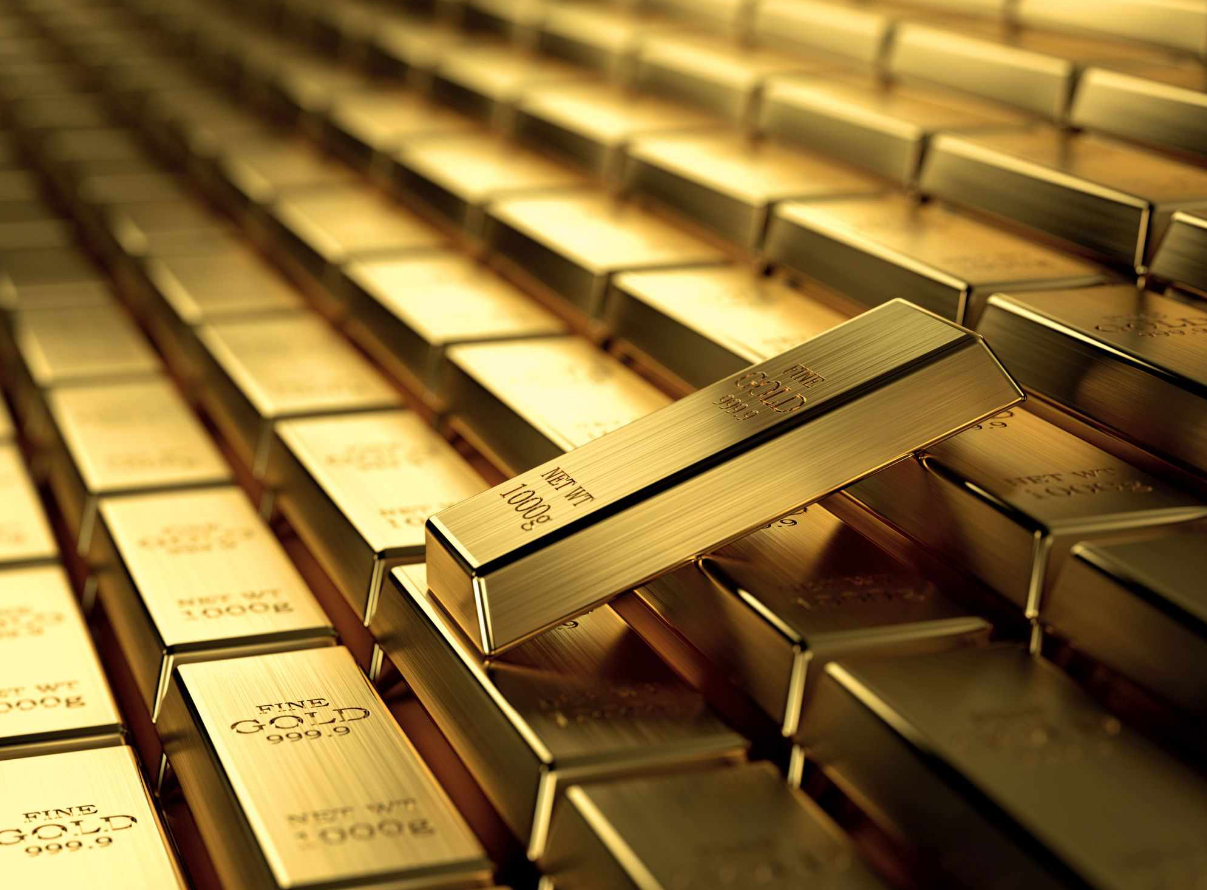

In [6]:
# Please run the next 4 cells. 
# After each cell completed, please restart the Kernel

# It is needed to run only one time for the computer

In [7]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


___________________________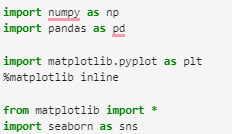

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import *
import seaborn as sns

_____________________________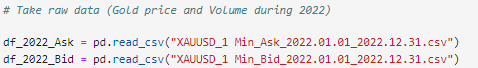

In [14]:
df_2022_Ask = pd.read_csv("XAUUSD_1 Min_Ask_2022.01.01_2022.12.31.csv")
df_2022_Bid = pd.read_csv("XAUUSD_1 Min_Bid_2022.01.01_2022.12.31.csv")

________________________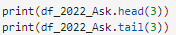

In [16]:
print(df_2022_Ask.head(3))
print(df_2022_Ask.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2022.01.02 23:00:00  1829.656  1830.936  1829.386  1830.196  0.02454
1  2022.01.02 23:01:00  1829.936  1830.676  1829.916  1830.632  0.02697
2  2022.01.02 23:02:00  1830.612  1831.226  1830.516  1831.146  0.04489
                Time (UTC)      Open      High       Low     Close  Volume 
16162  2022.01.18 19:23:00  1815.042  1815.142  1815.022  1815.112  0.02450
16163  2022.01.18 19:24:00  1815.112  1815.152  1815.052  1815.112  0.01995
16164  2022.01.18 19:25:00  1815.106  1815.142  1814.692  1814.732  0.02003


_____________________

In [18]:
print(df_2022_Bid.head(3))
print(df_2022_Bid.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2022.01.02 23:00:00  1828.604  1829.628  1828.544  1829.504  0.02635
1  2022.01.02 23:01:00  1829.504  1830.104  1829.398  1830.004  0.01939
2  2022.01.02 23:02:00  1830.098  1830.604  1829.998  1830.534  0.03017
                Time (UTC)      Open      High       Low     Close  Volume 
16163  2022.01.18 19:24:00  1814.764  1814.814  1814.704  1814.754  0.00913
16164  2022.01.18 19:25:00  1814.754  1814.804  1814.344  1814.404  0.01000
16165  2022.01.18 19:26:00       NaN       NaN       NaN       NaN      NaN


In [19]:
# rows numbers and 'Time (UTC)' are the same in the rows with the same indices for Ask and Bid datasets

___________________________

In [21]:
df_2022_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  16165 non-null  object 
 1   Open        16165 non-null  float64
 2   High        16165 non-null  float64
 3   Low         16165 non-null  float64
 4   Close       16165 non-null  float64
 5   Volume      16165 non-null  float64
dtypes: float64(5), object(1)
memory usage: 757.9+ KB


________________________

In [23]:
df_2022_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16166 entries, 0 to 16165
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  16166 non-null  object 
 1   Open        16165 non-null  float64
 2   High        16165 non-null  float64
 3   Low         16165 non-null  float64
 4   Close       16165 non-null  float64
 5   Volume      16165 non-null  float64
dtypes: float64(5), object(1)
memory usage: 757.9+ KB


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

In [25]:
#df_2022_Bid.merge?

________________________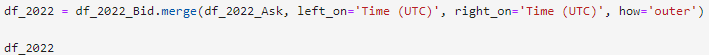

In [27]:
df_2022 = df_2022_Bid.merge(df_2022_Ask, left_on='Time (UTC)', right_on= 'Time (UTC)', how='outer')
df_2022

Time (UTC)    Open_x    High_x     Low_x   Close_x  Volume _x  \
0      2022.01.02 23:00:00  1828.604  1829.628  1828.544  1829.504    0.02635   
1      2022.01.02 23:01:00  1829.504  1830.104  1829.398  1830.004    0.01939   
2      2022.01.02 23:02:00  1830.098  1830.604  1829.998  1830.534    0.03017   
3      2022.01.02 23:03:00  1830.534  1830.704  1830.504  1830.674    0.00540   
4      2022.01.02 23:04:00  1830.674  1830.674  1830.448  1830.508    0.01806   
...                    ...       ...       ...       ...       ...        ...   
16161  2022.01.18 19:22:00  1814.748  1814.804  1814.484  1814.704    0.01623   
16162  2022.01.18 19:23:00  1814.704  1814.804  1814.704  1814.774    0.01145   
16163  2022.01.18 19:24:00  1814.764  1814.814  1814.704  1814.754    0.00913   
16164  2022.01.18 19:25:00  1814.754  1814.804  1814.344  1814.404    0.01000   
16165  2022.01.18 19:26:00       NaN       NaN       NaN       NaN        NaN   

         Open_y    High_y     Low_y   Close_y  Volume _y  
0      1829.656  1830.936  1829.386  1830.196    0.02454  
1      1829.936  1830.676  1829.916  1830.632    0.02697  
2      1830.612  1831.226  1830.516  1831.146    0.04489  
3      1831.156  1831.306  1831.046  1831.046    0.01846  
4      1831.026  1831.181  1830.886  1831.086    0.02912  
...         ...       ...       ...       ...        ...  
16161  1815.102  1815.122  1814.852  1815.032    0.03050  
16162  1815.042  1815.142  1815.022  1815.112    0.02450  
16163  1815.112  1815.152  1815.052  1815.112    0.01995  
16164  1815.106  1815.142  1814.692  1814.732    0.02003  
16165       NaN       NaN       NaN       NaN        NaN  

[16166 rows x 11 columns]

______________________________

______________________________

In [30]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16166 entries, 0 to 16165
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (UTC)  16166 non-null  object 
 1   Open_x      16165 non-null  float64
 2   High_x      16165 non-null  float64
 3   Low_x       16165 non-null  float64
 4   Close_x     16165 non-null  float64
 5   Volume _x   16165 non-null  float64
 6   Open_y      16165 non-null  float64
 7   High_y      16165 non-null  float64
 8   Low_y       16165 non-null  float64
 9   Close_y     16165 non-null  float64
 10  Volume _y   16165 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.4+ MB


In [31]:
# No NaN elements ! It's Good !

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [33]:
# rename columns

df_2022.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

____________________________

In [35]:
df_2022.head(3)

Local time  Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  \
0  2022.01.02 23:00:00  1828.604  1829.628  1828.544   1829.504     0.02635   
1  2022.01.02 23:01:00  1829.504  1830.104  1829.398   1830.004     0.01939   
2  2022.01.02 23:02:00  1830.098  1830.604  1829.998   1830.534     0.03017   

   Open_Ask  High_Ask   Low_Ask  Close_Ask  Volume_Ask  
0  1829.656  1830.936  1829.386   1830.196     0.02454  
1  1829.936  1830.676  1829.916   1830.632     0.02697  
2  1830.612  1831.226  1830.516   1831.146     0.04489

In [36]:
# Save preliminary dataset

________________________________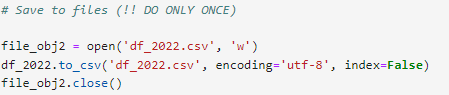

In [38]:
file_obj2 = open('df_2022.csv', 'w')
df_2022.to_csv('df_2022.csv', encoding= 'utf-8', index=False)
file_obj2.close()

In [39]:
# Please find the df_2022.csv file in your folder

___________________________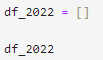

In [41]:
df_2022 = []
df_2022

[]

#### Upload the preliminary dataset

_______________________

In [44]:
df = pd.read_csv('df_2022.csv', low_memory=False, sep=',')

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [46]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [47]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

___________________________

In [49]:
df.describe()

Open_Bid      High_Bid       Low_Bid     Close_Bid    Volume_Bid  \
count  16165.000000  16165.000000  16165.000000  16165.000000  16165.000000   
mean    1811.368928   1811.569999   1811.164173   1811.367926      0.029535   
std       11.771542     11.749578     11.790634     11.770760      0.023221   
min     1783.455000   1784.048000   1782.495000   1783.415000      0.000250   
25%     1801.868000   1802.084000   1801.694000   1801.854000      0.013970   
50%     1814.889000   1815.068000   1814.718000   1814.888000      0.022780   
75%     1821.078000   1821.258000   1820.868000   1821.078000      0.037300   
max     1831.544000   1831.624000   1831.319000   1831.584000      0.229700   

           Open_Ask      High_Ask       Low_Ask     Close_Ask    Volume_Ask  \
count  16165.000000  16165.000000  16165.000000  16165.000000  16165.000000   
mean    1811.716141   1811.916951   1811.510928   1811.716194      0.029463   
std       11.770799     11.748813     11.789744     11.770091      0.022766   
min     1783.732000   1784.392000   1782.835000   1783.732000      0.000200   
25%     1802.206000   1802.412000   1802.022000   1802.206000      0.013830   
50%     1815.232000   1815.402000   1815.066000   1815.232000      0.022990   
75%     1821.415000   1821.612000   1821.215000   1821.422000      0.038220   
max     1831.916000   1832.076000   1831.692000   1831.956000      0.339450   

       Volume_Delta  Volume_Delta_abs    Open_Delta    High_Delta  \
count  16165.000000      16165.000000  16165.000000  16165.000000   
mean      -0.000072          0.009768      0.347214      0.346952   
std        0.013794          0.009740      0.061319      0.052078   
min       -0.179660          0.000000      0.102000      0.102000   
25%       -0.007120          0.003110      0.314000      0.317000   
50%       -0.000120          0.007140      0.347000      0.346000   
75%        0.007160          0.013470      0.377000      0.377000   
max        0.216750          0.216750      2.184000      1.567000   

          Low_Delta   Close_Delta  
count  16165.000000  16165.000000  
mean       0.346755      0.348268  
std        0.049645      0.051191  
min        0.116000      0.122000  
25%        0.317000      0.318000  
50%        0.347000      0.348000  
75%        0.377000      0.378000  
max        1.142000      1.134000

____________________________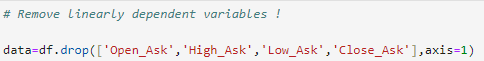

In [51]:
data = df.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'],axis=1)

__________________________

In [53]:
data.shape

(16166, 13)

_________________________

In [55]:
data.head(3)

Local time  Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  \
0  2022.01.02 23:00:00  1828.604  1829.628  1828.544   1829.504     0.02635   
1  2022.01.02 23:01:00  1829.504  1830.104  1829.398   1830.004     0.01939   
2  2022.01.02 23:02:00  1830.098  1830.604  1829.998   1830.534     0.03017   

   Volume_Ask  Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  \
0     0.02454      -0.00181           0.00181       1.052       1.308   
1     0.02697       0.00758           0.00758       0.432       0.572   
2     0.04489       0.01472           0.01472       0.514       0.622   

   Low_Delta  Close_Delta  
0      0.842        0.692  
1      0.518        0.628  
2      0.518        0.612

<html> <h3 style="font-style:italic; color:blue;"> Date transformation </h3> </html>

______________________

In [58]:
import datetime

_________________________

In [60]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

________________________

In [62]:
data=data.drop(['Local time'],axis=1)

________________________

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16166 entries, 0 to 16165
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_Bid          16165 non-null  float64            
 1   High_Bid          16165 non-null  float64            
 2   Low_Bid           16165 non-null  float64            
 3   Close_Bid         16165 non-null  float64            
 4   Volume_Bid        16165 non-null  float64            
 5   Volume_Ask        16165 non-null  float64            
 6   Volume_Delta      16165 non-null  float64            
 7   Volume_Delta_abs  16165 non-null  float64            
 8   Open_Delta        16165 non-null  float64            
 9   High_Delta        16165 non-null  float64            
 10  Low_Delta         16165 non-null  float64            
 11  Close_Delta       16165 non-null  float64            
 12  Local_time_T      16166 non-null  datetime64[ns, UTC]
dtypes

____________________________

In [66]:
data.head(3)

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
0  1828.604  1829.628  1828.544   1829.504     0.02635     0.02454   
1  1829.504  1830.104  1829.398   1830.004     0.01939     0.02697   
2  1830.098  1830.604  1829.998   1830.534     0.03017     0.04489   

   Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
0      -0.00181           0.00181       1.052       1.308      0.842   
1       0.00758           0.00758       0.432       0.572      0.518   
2       0.01472           0.01472       0.514       0.622      0.518   

   Close_Delta              Local_time_T  
0        0.692 2022-01-02 23:00:00+00:00  
1        0.628 2022-01-02 23:01:00+00:00  
2        0.612 2022-01-02 23:02:00+00:00

<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

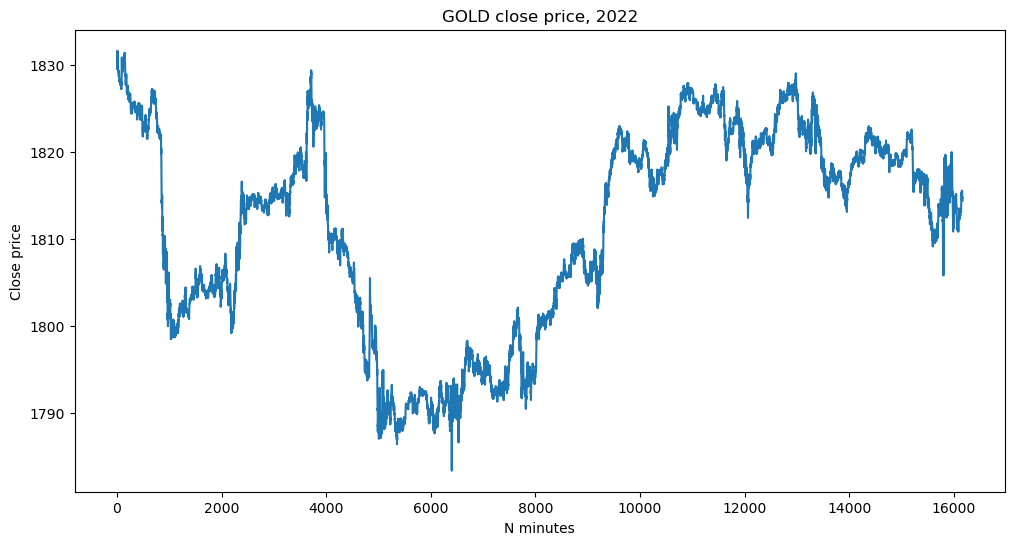

In [69]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('GOLD close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

#### Candlestick chart for 70 minutes 

_____________________________

In [72]:
data_chart = data.set_index('Local_time_T', inplace=False)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [74]:
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

____________________________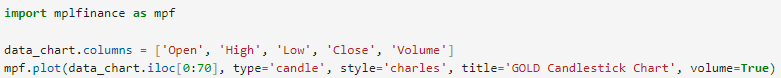

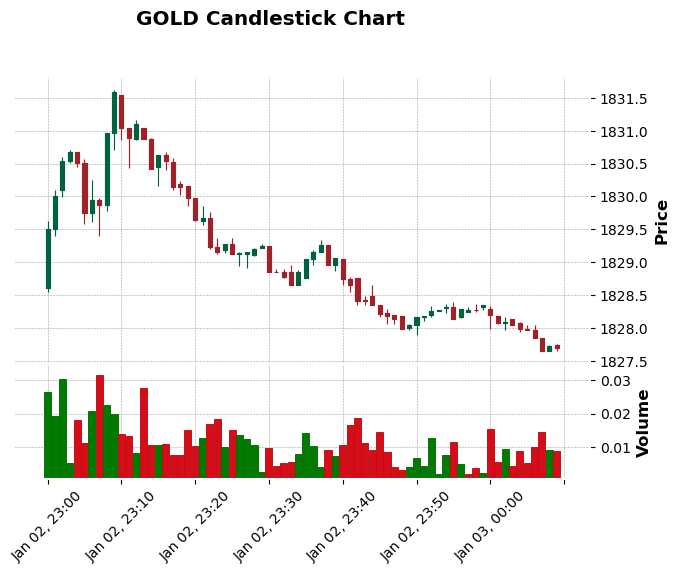

In [76]:
import mplfinance as mpf
data_chart.columns = ['Open', 'High', 'Low', 'Close','Volume']
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles',title='GOLD Candlestick Chart', volume=True)

_______________________________________

In [78]:
dat_chart = []

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

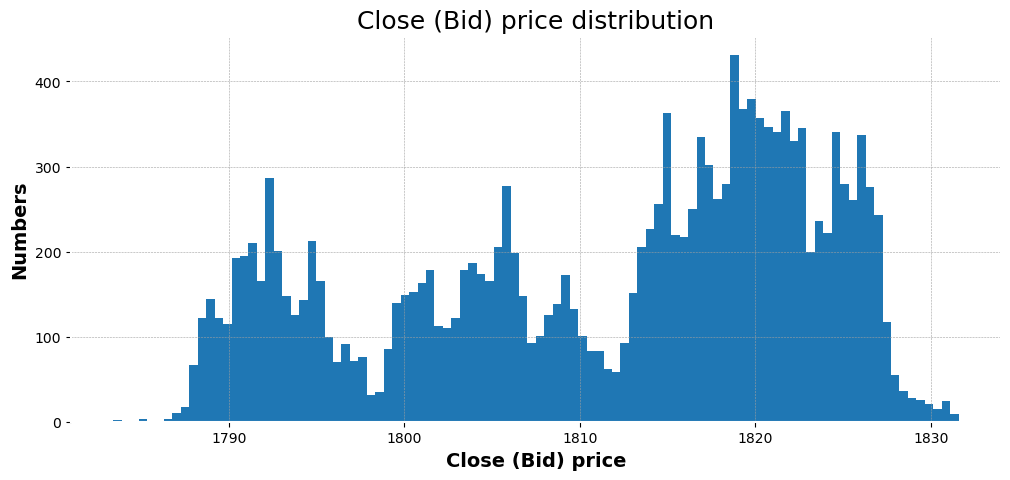

In [80]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14)
plt.show()

<html> <h4 style="color:blue;"> To speed up writing the code in the following few cells that plot graphs, you can copy and then slightly modify the code from the previous cells. </h4> </html>


______________________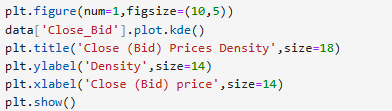

______________________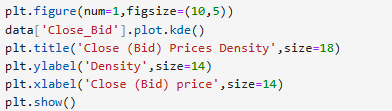

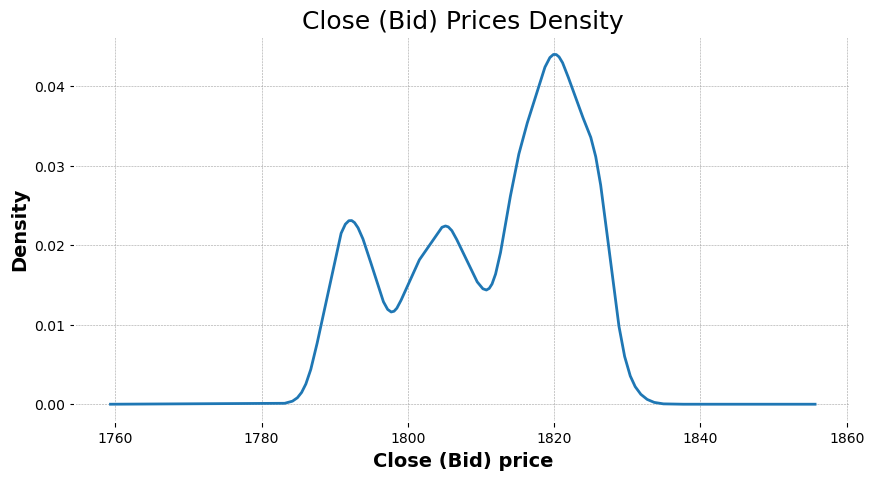

In [84]:
plt.figure(num=1,figsize=(10,5))
data['Close_Bid'].plot.kde()
plt.title('Close (Bid) Prices Density', size=18)
plt.ylabel('Density',size=14)
plt.xlabel('Close (Bid) price', size=14)
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

<Figure size 1200x500 with 0 Axes>

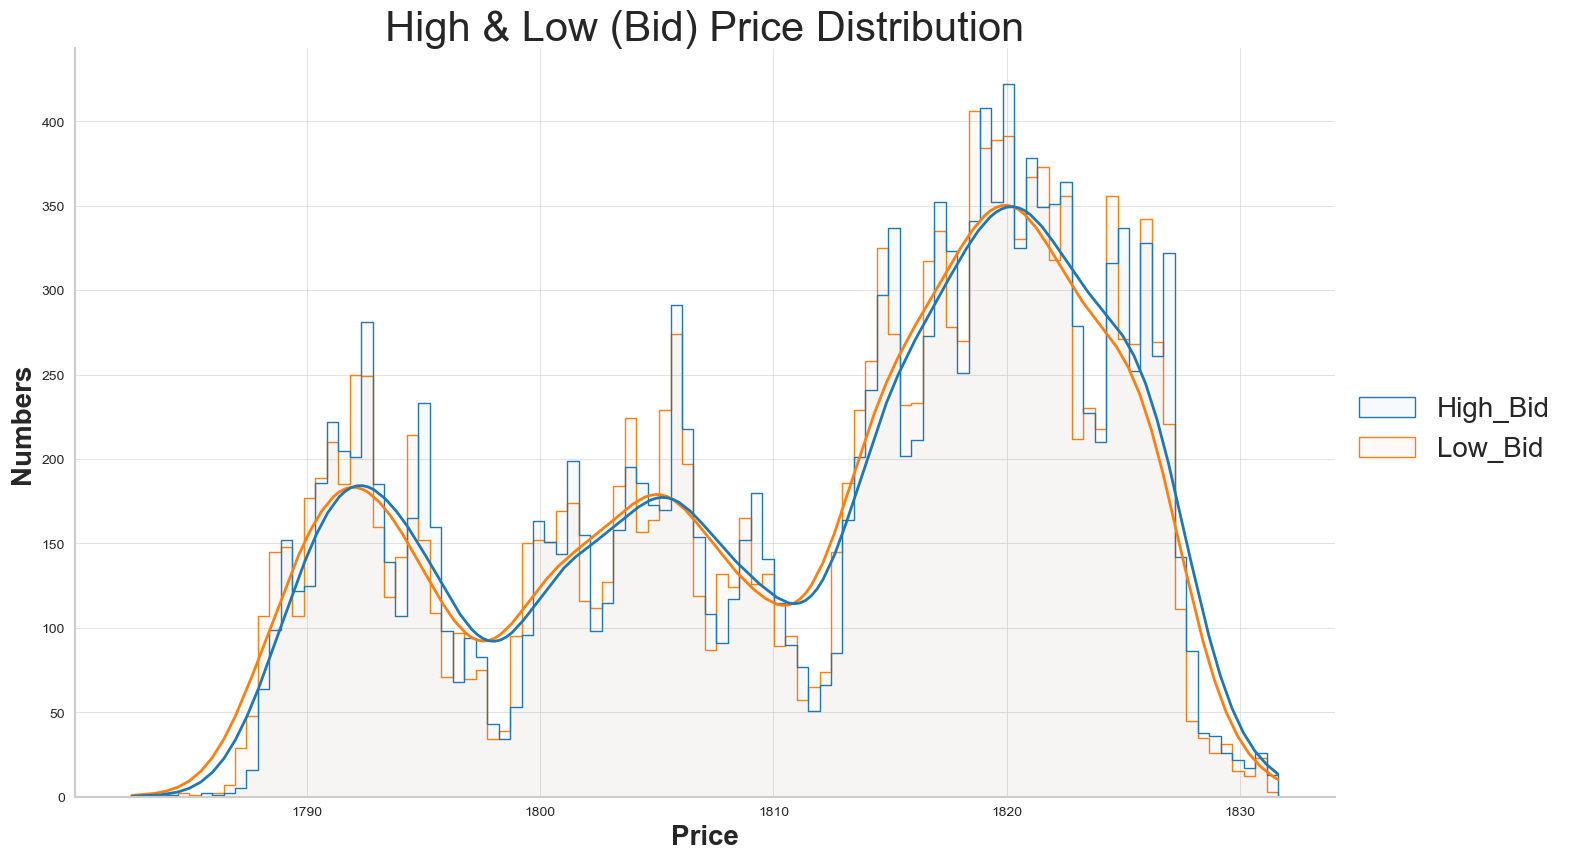

In [86]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show()

__________________________________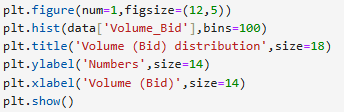

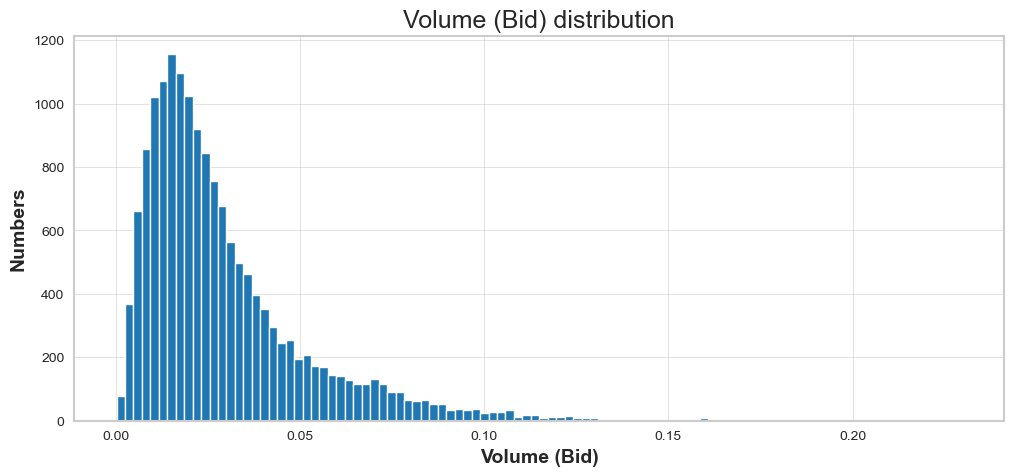

In [88]:
plt.figure(num=1, figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Volume (Bid)', size=14)
plt.show()

_____________________________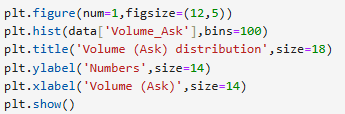

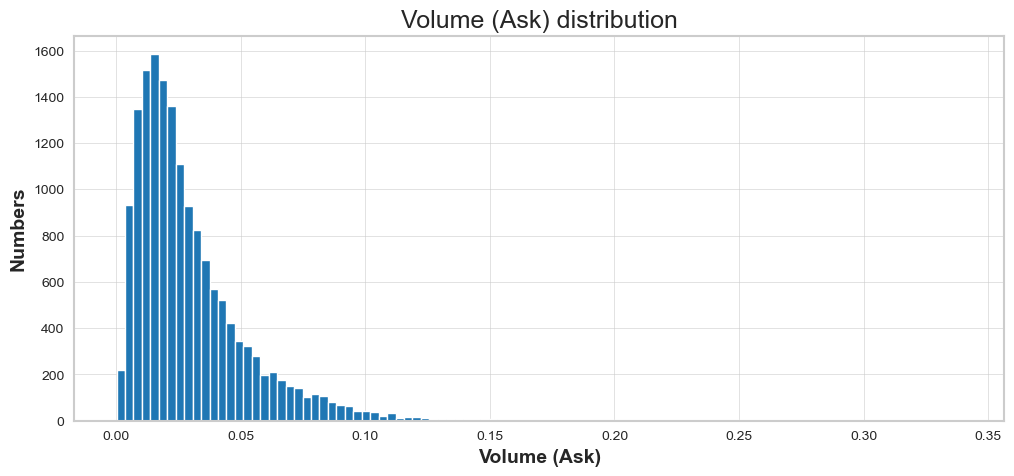

In [90]:
plt.figure(num=1, figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volume (Ask) distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Volume (Ask)', size=14)
plt.show()

In [91]:
# Pay attention that large Bid volumes are larger than large Ask volumes.
# That is, trades are more significant when falling. This is a typical situation in financial markets.

<html> <h3 style="color:blue;"> Print the thin long tail of the volume(Bid and Ask) histograms. </h3> </html>

_________________________________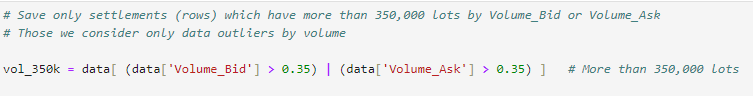

In [94]:
vol_350k = data [(data['Volume_Bid'] > 0.35) | (data['Volume_Ask'] > 0.35)]

____________________________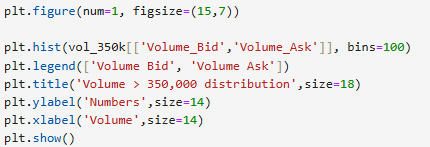

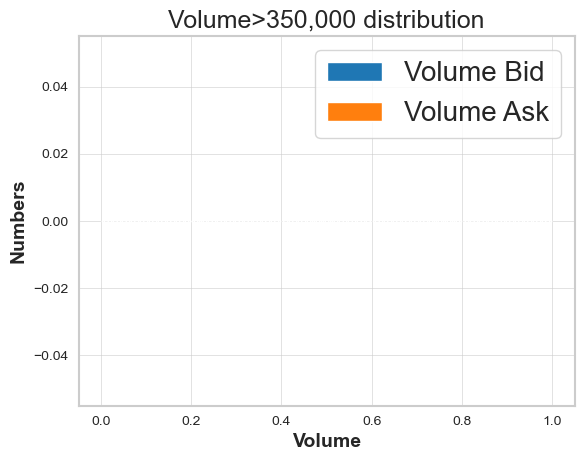

In [96]:
plt.hist(vol_350k[['Volume_Bid', 'Volume_Ask']], bins=100)
plt.legend(['Volume Bid', 'Volume Ask'])
plt.title('Volume>350,000 distribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('Volume', size=14)
plt.show()

____________________________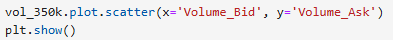

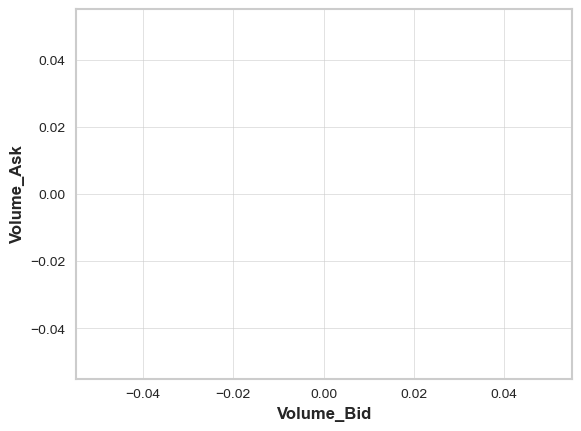

In [98]:
vol_350k.plot.scatter(x='Volume_Bid', y='Volume_Ask')
plt.show()

In [99]:
# The same Distribution but with another style

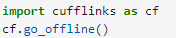

In [101]:
import cufflinks as cf
cf.go_offline()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

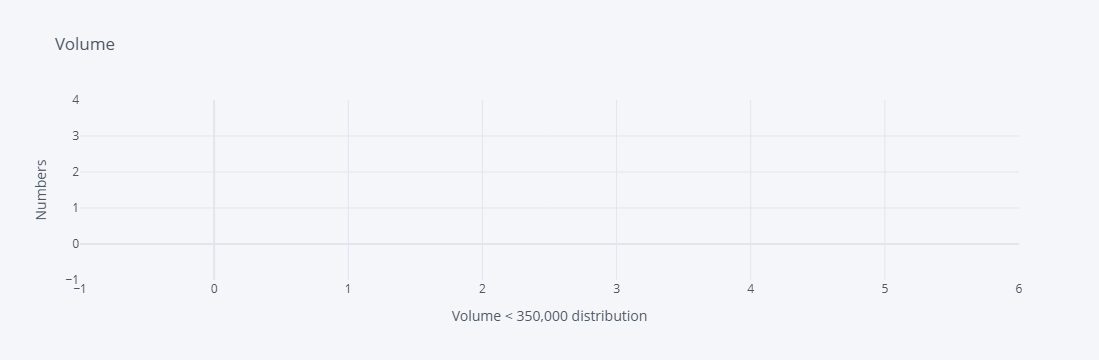

In [103]:
vol_350k[['Volume_Ask', 'Volume_Bid']].iplot(
                            kind='hist',
                            histnorm='percent',
                            barmode='overlay',
                            xTitle='Volume < 350,000 distribution',
                            yTitle='Numbers',
                            title='Volume')

In [104]:
# ! Click "Export to plot.ly" in the lower right corner

<html> <h4 style="color:blue;"> To speed up writing the code in the following few cells that plot graphs, you can copy and then slightly modify the code from the previous cells. </h4> </html>

_______________________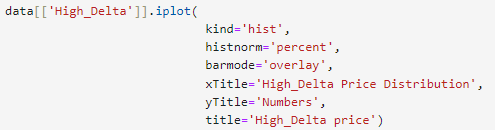

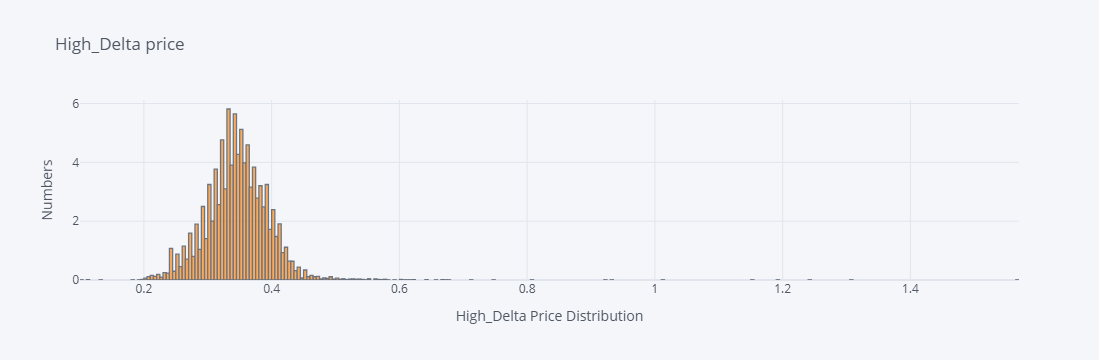

In [107]:
data[['High_Delta']].iplot(
                            kind='hist',
                            histnorm='percent',
                            barmode='overlay',
                            xTitle='High_Delta Price Distribution',
                            yTitle='Numbers',
                            title='High_Delta price')

In [108]:
# ! Click "Export to plot.ly" in the lower right corner

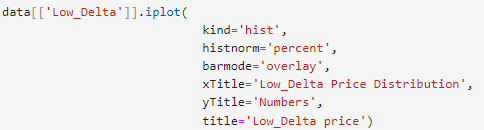

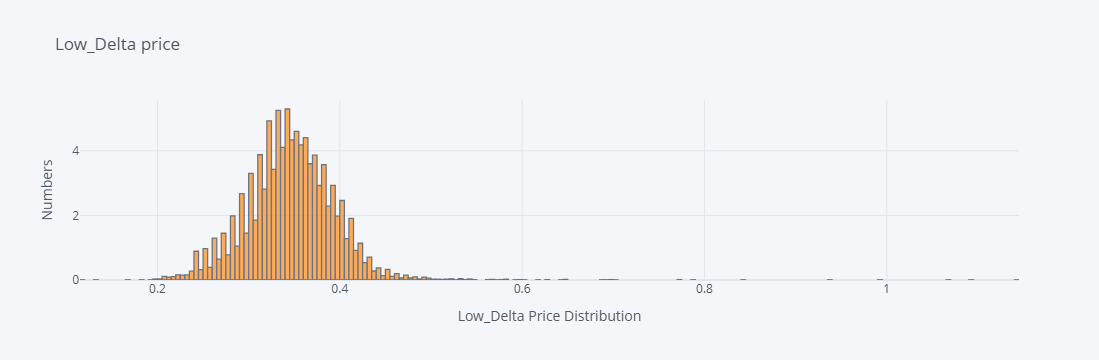

In [110]:
data[['Low_Delta']].iplot(
                            kind='hist',
                            histnorm='percent',
                            barmode='overlay',
                            xTitle='Low_Delta Price Distribution',
                            yTitle='Numbers',title='Low_Delta price')

In [111]:
# ! Click "Export to plot.ly" in the lower right corner

_________________________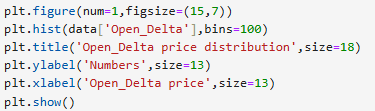

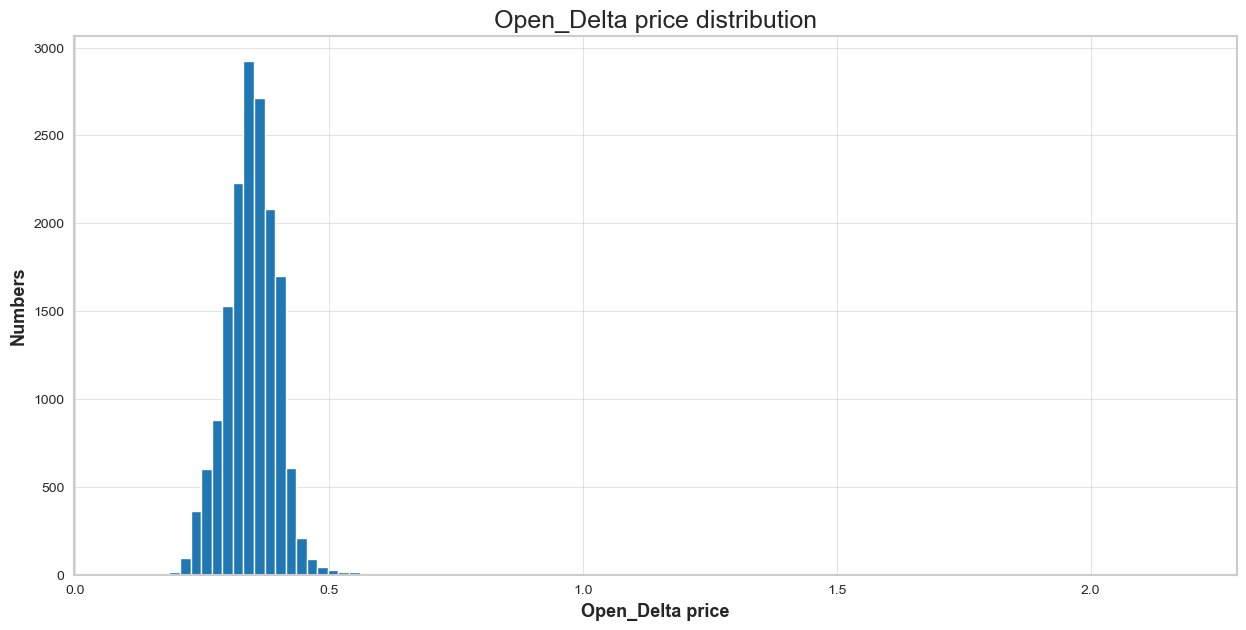

In [113]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Open_Delta'],bins=100)
plt.title('Open_Delta price distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Open_Delta price',size=13)
plt.show()

_____________________________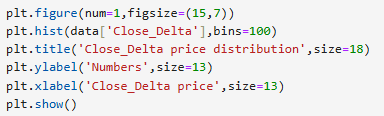

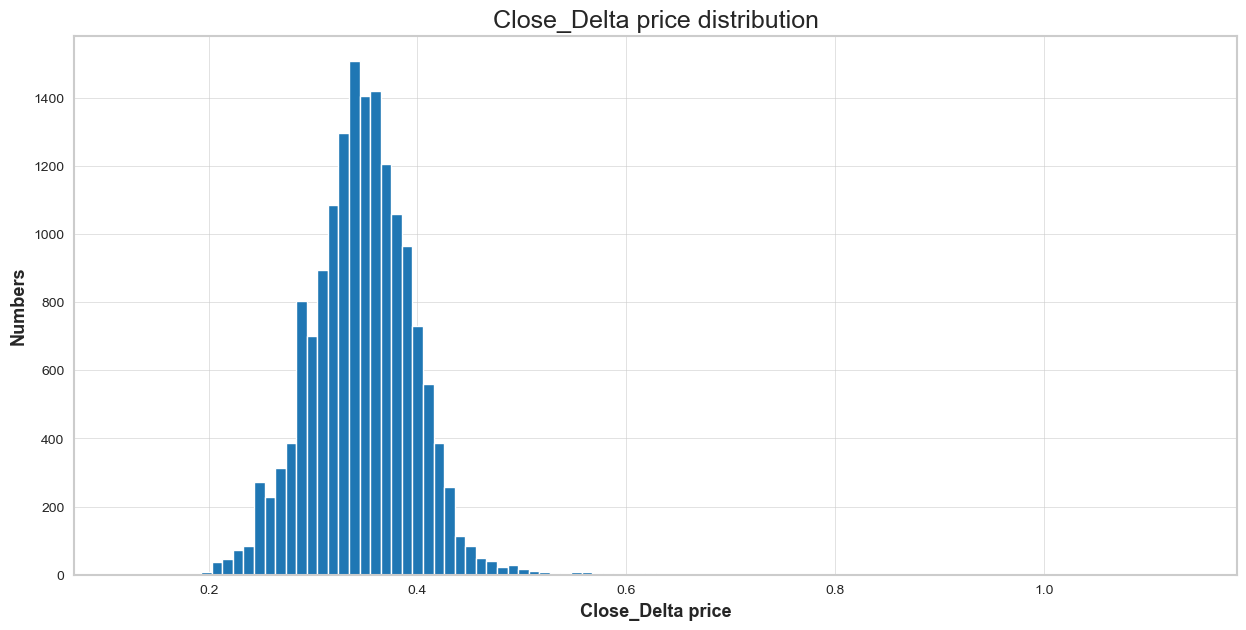

In [115]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Close_Delta'],bins=100)
plt.title('Close_Delta price distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Close_Delta price',size=13)
plt.show()

In [116]:
# Pay attention to the difference in the Delta distributions above !
# Clouse_Delta price could be significantly higher than other Delta prices,
# It means, that at the end of the trading day, we have a big spread that can destroy potential profit,
# if you do not close the position in advance of the end of the trading day

____________________________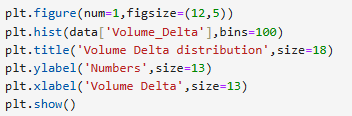

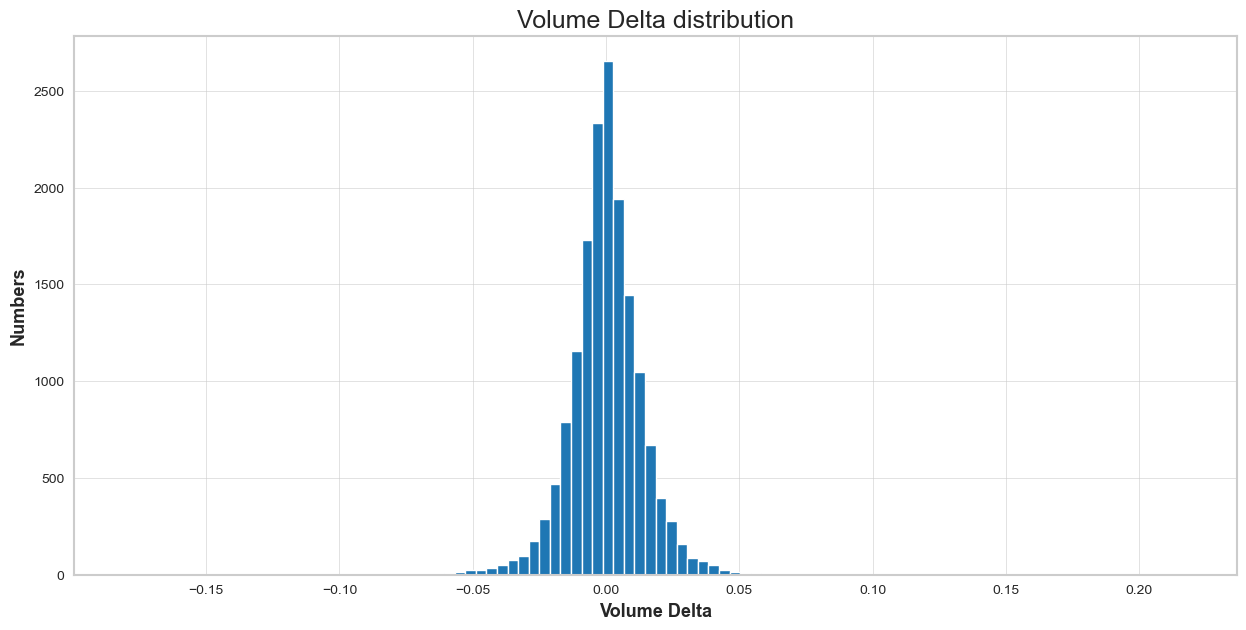

In [118]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13)
plt.show()

_________________________________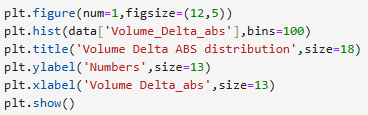

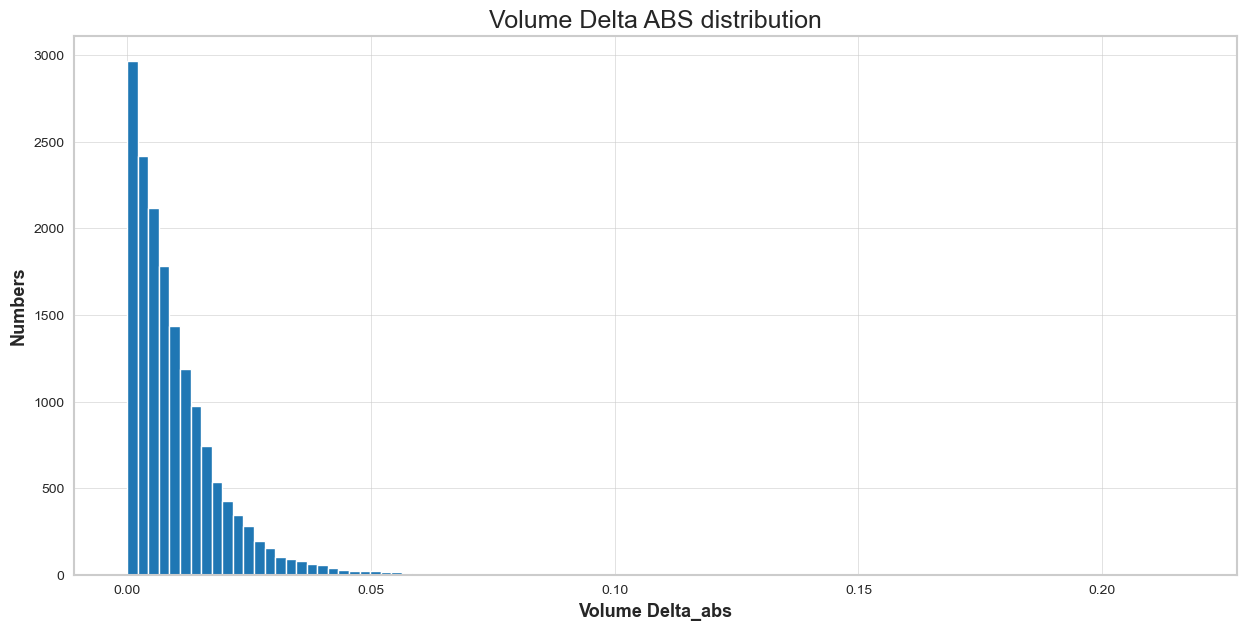

In [120]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Delta_abs'],bins=100)
plt.title('Volume Delta ABS distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta_abs',size=13)
plt.show()

_____________________________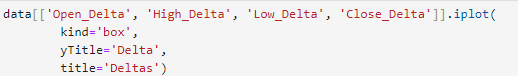

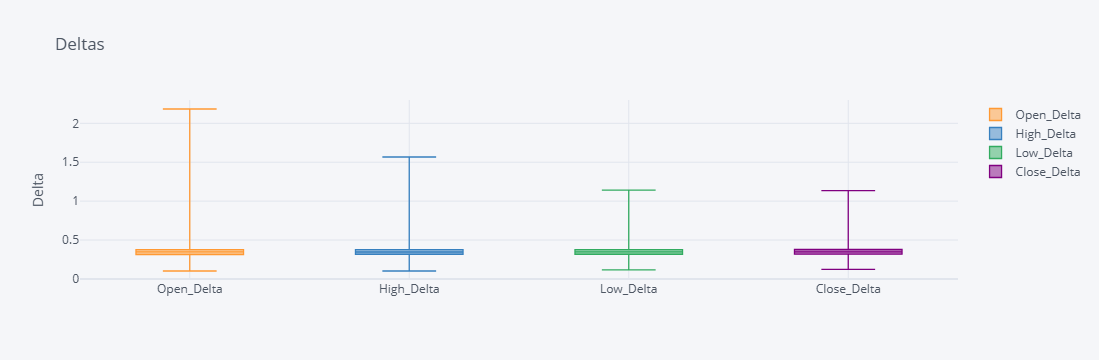

In [122]:
data[['Open_Delta', 'High_Delta','Low_Delta', 'Close_Delta']].iplot(
        kind='box',
        yTitle='Delta',
        title='Deltas')

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

C:\Users\preyp\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



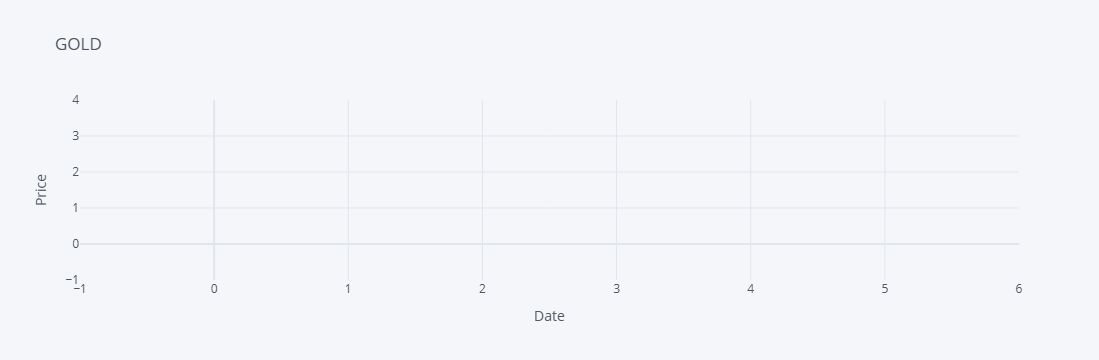

In [124]:
# plot the part of the whole dataset using iplot()
# The time period equals 400 minutes: from 19800 to 20200

data.iloc[19800:20200,:][['High_Bid', 'Low_Bid', 'Local_time_T', 'Volume_Ask','Volume_Bid']].iplot(
                                                x='Local_time_T', y=['High_Bid', 'Low_Bid'], 
                                                mode='lines+markers', 
                                                xTitle='Date', yTitle='Price',
                                                title='GOLD ')

In [125]:
# ! Click "Export to plot.ly" in the lower right corner

<html> <h3 style="font-style:italic; color:blue;"> Indicate starts of days and weeks </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [128]:
# Create a new time column by moving it down one row

data['Local_time_T_shipt_1_Down'] = data['Local_time_T'].shift(1)

____________________________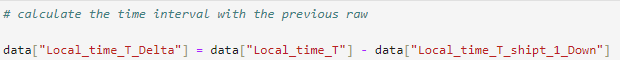

In [130]:
data["Loca_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

_______________________________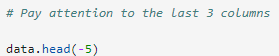

In [132]:
data.head(-5)

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
0      1828.604  1829.628  1828.544   1829.504     0.02635     0.02454   
1      1829.504  1830.104  1829.398   1830.004     0.01939     0.02697   
2      1830.098  1830.604  1829.998   1830.534     0.03017     0.04489   
3      1830.534  1830.704  1830.504   1830.674     0.00540     0.01846   
4      1830.674  1830.674  1830.448   1830.508     0.01806     0.02912   
...         ...       ...       ...        ...         ...         ...   
16156  1815.418  1815.508  1815.348   1815.504     0.02424     0.02151   
16157  1815.504  1815.594  1815.198   1815.204     0.01785     0.02511   
16158  1815.214  1815.344  1815.054   1815.094     0.01140     0.02313   
16159  1815.054  1815.184  1814.984   1815.114     0.01434     0.03118   
16160  1815.114  1815.114  1814.694   1814.744     0.01760     0.03185   

       Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
0          -0.00181           0.00181       1.052       1.308      0.842   
1           0.00758           0.00758       0.432       0.572      0.518   
2           0.01472           0.01472       0.514       0.622      0.518   
3           0.01306           0.01306       0.622       0.602      0.542   
4           0.01106           0.01106       0.352       0.507      0.438   
...             ...               ...         ...         ...        ...   
16156      -0.00273           0.00273       0.344       0.344      0.374   
16157       0.00726           0.00726       0.338       0.268      0.314   
16158       0.01173           0.01173       0.298       0.268      0.288   
16159       0.01684           0.01684       0.288       0.308      0.348   
16160       0.01425           0.01425       0.338       0.338      0.328   

       Close_Delta              Local_time_T Local_time_T_shipt_1_Down  \
0            0.692 2022-01-02 23:00:00+00:00                       NaT   
1            0.628 2022-01-02 23:01:00+00:00 2022-01-02 23:00:00+00:00   
2            0.612 2022-01-02 23:02:00+00:00 2022-01-02 23:01:00+00:00   
3            0.372 2022-01-02 23:03:00+00:00 2022-01-02 23:02:00+00:00   
4            0.578 2022-01-02 23:04:00+00:00 2022-01-02 23:03:00+00:00   
...            ...                       ...                       ...   
16156        0.328 2022-01-18 19:17:00+00:00 2022-01-18 19:16:00+00:00   
16157        0.308 2022-01-18 19:18:00+00:00 2022-01-18 19:17:00+00:00   
16158        0.298 2022-01-18 19:19:00+00:00 2022-01-18 19:18:00+00:00   
16159        0.328 2022-01-18 19:20:00+00:00 2022-01-18 19:19:00+00:00   
16160        0.358 2022-01-18 19:21:00+00:00 2022-01-18 19:20:00+00:00   

      Loca_time_T_Delta  
0                   NaT  
1       0 days 00:01:00  
2       0 days 00:01:00  
3       0 days 00:01:00  
4       0 days 00:01:00  
...                 ...  
16156   0 days 00:01:00  
16157   0 days 00:01:00  
16158   0 days 00:01:00  
16159   0 days 00:01:00  
16160   0 days 00:01:00  

[16161 rows x 15 columns]

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [134]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).

data.loc[data.index[0], 'Local_time_T_Delta'] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

'2 days 01:01:00'

____________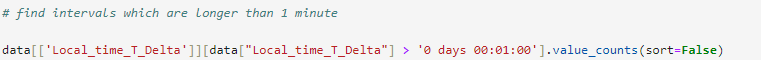

In [136]:
data[['Local_time_T_Delta']][data["Local_time_T_Delta"]> '0 days 00:01:00'].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00       1
Name: count, dtype: int64

In [137]:
# We found the duration of night intervals when there is no trading in Gold.
# Total such intervals - 258, which is equal to the number of trading days in 2022 year

_______________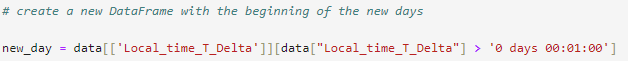

In [139]:
new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"]> '0 days 00:01:00']

_________________

In [141]:
new_day['Local_time_T_Delta'].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00    1
Name: count, dtype: int64

_____________________________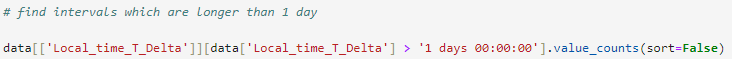

In [143]:
data[['Local_time_T_Delta']][data['Local_time_T_Delta']> '1 days 00:00:00'].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00       1
Name: count, dtype: int64

In [144]:
# We found the weekend and holidays duration when there was no trading in Gold.
# Total intervals - 52, which is equal to the number of weekends in the 2022 year

____________________________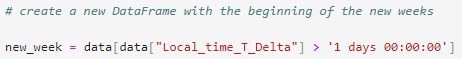

In [146]:
new_week = data[data["Local_time_T_Delta"]> '1 days 00:00:00']

_______________________

In [148]:
new_week["Local_time_T_Delta"].value_counts(sort=False)

Local_time_T_Delta
2 days 01:01:00    1
Name: count, dtype: int64

____________________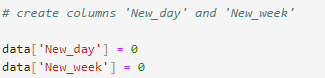

In [150]:
data['New_day'] = 0
data['New_week'] = 0

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [152]:
# Fill in "1" in the starts of day column

data.loc[data["Local_time_T_Delta"] > '0 days 00:01:00', 'New_day'] = 1

_________________________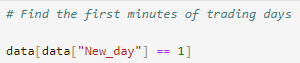

In [154]:
data[data["New_day"] == 1]

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
0  1828.604  1829.628  1828.544   1829.504     0.02635     0.02454   

   Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
0      -0.00181           0.00181       1.052       1.308      0.842   

   Close_Delta              Local_time_T Local_time_T_shipt_1_Down  \
0        0.692 2022-01-02 23:00:00+00:00                       NaT   

  Loca_time_T_Delta Local_time_T_Delta  New_day  New_week  
0               NaT    2 days 01:01:00        1         0

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [156]:
# Fill in "1s" in the starts of week column

data.loc[data["Local_time_T_Delta"] >'1 days 00:00:00', 'New_week'] = 1

__________________________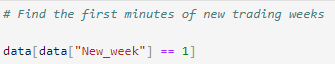

In [158]:
data[data["New_week"] == 1]

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
0  1828.604  1829.628  1828.544   1829.504     0.02635     0.02454   

   Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
0      -0.00181           0.00181       1.052       1.308      0.842   

   Close_Delta              Local_time_T Local_time_T_shipt_1_Down  \
0        0.692 2022-01-02 23:00:00+00:00                       NaT   

  Loca_time_T_Delta Local_time_T_Delta  New_day  New_week  
0               NaT    2 days 01:01:00        1         1

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [160]:
# drop the columns that are no longer needed, 
# since the time series is regular 
# (each line is the next minute, except for the marked lines in the New_day and New_week columns

data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

_________________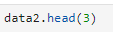

In [162]:
data2.head(3)

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
0  1828.604  1829.628  1828.544   1829.504     0.02635     0.02454   
1  1829.504  1830.104  1829.398   1830.004     0.01939     0.02697   
2  1830.098  1830.604  1829.998   1830.534     0.03017     0.04489   

   Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
0      -0.00181           0.00181       1.052       1.308      0.842   
1       0.00758           0.00758       0.432       0.572      0.518   
2       0.01472           0.01472       0.514       0.622      0.518   

   Close_Delta Loca_time_T_Delta  New_day  New_week  
0        0.692               NaT        1         1  
1        0.628   0 days 00:01:00        0         0  
2        0.612   0 days 00:01:00        0         0

_______________

In [164]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16166 entries, 0 to 16165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Open_Bid           16165 non-null  float64        
 1   High_Bid           16165 non-null  float64        
 2   Low_Bid            16165 non-null  float64        
 3   Close_Bid          16165 non-null  float64        
 4   Volume_Bid         16165 non-null  float64        
 5   Volume_Ask         16165 non-null  float64        
 6   Volume_Delta       16165 non-null  float64        
 7   Volume_Delta_abs   16165 non-null  float64        
 8   Open_Delta         16165 non-null  float64        
 9   High_Delta         16165 non-null  float64        
 10  Low_Delta          16165 non-null  float64        
 11  Close_Delta        16165 non-null  float64        
 12  Loca_time_T_Delta  16165 non-null  timedelta64[ns]
 13  New_day            16166 non-null  int64      

<html> <h3 style="font-style:italic; color:blue;"> Create Outputs (vector of answers) </h3> </html>


- we will predict 'High_Bid' and 'Low_Ask'
since we are interested in the maximum and minimum prices of the next minute at which we can
 - sell at the maximum price (High_Bid) or 
 - buy at the minimum price (Low_Ask = Low_Bid + Low_Delta)


____________________________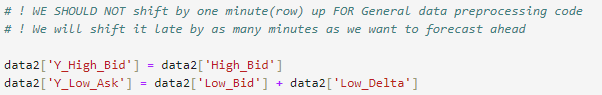

In [168]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Bid'] + data2['Low_Delta']

_______________________

In [170]:
data2.tail()

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
16161  1814.748  1814.804  1814.484   1814.704     0.01623     0.03050   
16162  1814.704  1814.804  1814.704   1814.774     0.01145     0.02450   
16163  1814.764  1814.814  1814.704   1814.754     0.00913     0.01995   
16164  1814.754  1814.804  1814.344   1814.404     0.01000     0.02003   
16165       NaN       NaN       NaN        NaN         NaN         NaN   

       Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
16161       0.01427           0.01427       0.354       0.318      0.368   
16162       0.01305           0.01305       0.338       0.338      0.318   
16163       0.01082           0.01082       0.348       0.338      0.348   
16164       0.01003           0.01003       0.352       0.338      0.348   
16165           NaN               NaN         NaN         NaN        NaN   

       Close_Delta Loca_time_T_Delta  New_day  New_week  Y_High_Bid  Y_Low_Ask  
16161        0.328   0 days 00:01:00        0         0    1814.804   1814.852  
16162        0.338   0 days 00:01:00        0         0    1814.804   1815.022  
16163        0.358   0 days 00:01:00        0         0    1814.814   1815.052  
16164        0.328   0 days 00:01:00        0         0    1814.804   1814.692  
16165          NaN   0 days 00:01:00        0         0         NaN        NaN

<html> <h2 style="font-style:italic; color:blue;"> Data Normalisation </h2> </html>

Note:
A typical mistake when choosing a part of the data and time for scaling is to scale the entire dataset before it is divided into test and training data. It is a mistake because scaling starts the calculation of statistics, that is, minima/maxima of variables. When realizing time series forecasting in real life, at the time of their generation, you cannot have information from future observations. Therefore, statistics should be calculated on the training data, and then the result obtained will be applied to the test data. To take information “from the future” to generate predictions (that is, from a test sample), the model will produce forecasts with “system bias

In [173]:
# normalisation
# data=(data-data.min())/(data.max()-data.min())

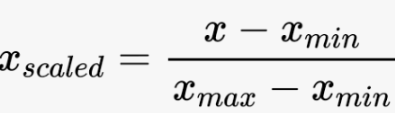

#### Create the TRAIN dataset to find Min and Max ​​for normalisation

##### Train / Validation / Test Split
- ~80% for training
- ~10% for validation
- ~10% for testing

In [177]:
# here we divide only the training set(80%) for the calculation of normalisation parameters
# The division into validation and training sets will be done immediately before training

______________________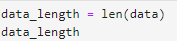

In [179]:
data_length = len(data)
data_length

16166

_____________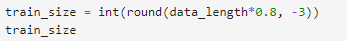

In [181]:
train_size = int(round(data_length*0.8, -3))
train_size

13000

_______________________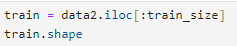

In [183]:
train = data2.iloc[:train_size]
train.shape

(13000, 17)

______________________

In [185]:
train.tail(2)

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
12998  1827.128  1827.138  1826.768   1826.898     0.03686     0.03044   
12999  1826.888  1826.908  1826.608   1826.668     0.02982     0.02989   

       Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
12998      -0.00642           0.00642       0.308       0.334      0.348   
12999       0.00007           0.00007       0.354       0.334      0.338   

       Close_Delta Loca_time_T_Delta  New_day  New_week  Y_High_Bid  Y_Low_Ask  
12998        0.344   0 days 00:01:00        0         0    1827.138   1827.116  
12999        0.344   0 days 00:01:00        0         0    1826.908   1826.946

<html> <h4 style="font-style:italic; color:blue;"> Find Max and Min for Prices, Volumes and Deltas </h4> </html>

In [187]:
# Max price is Max High_Ask = High_Bid + High_Delta
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

_________________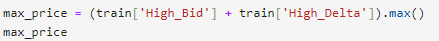

In [189]:
max_price =  (train['High_Bid'] + train['High_Delta']).max()
max_price

1832.076

_______________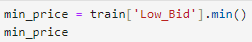

In [191]:
min_price = train['Low_Bid'].min()
min_price

1782.495

_____________________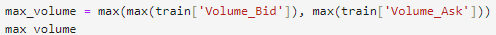

In [193]:
max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [195]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta

2.183999999999969

______________________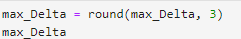

In [197]:
max_Delta = round(max_Delta,3)
max_Delta

2.184

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [199]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta

0.10200000000008913

________________________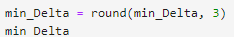

In [201]:
min_Delta = round(min_Delta,3)
min_Delta

0.102

_____________________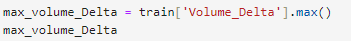

In [203]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

0.10793

__________________________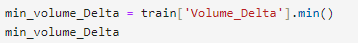

In [205]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-0.15428000000000003

__________________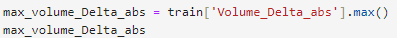

In [207]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

0.15428000000000003

________________________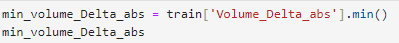

In [209]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [210]:
# min_volume_Delta_abs = 0
# Therefore, the normalisation formula for volume_Delta_abs is simplified

<html> <h4 style="font-style:italic; color:blue;"> Normalise </h4> </html>
Run each cell only one time !


#### Now just press 'CTRL' and 'ENTER' keys on the next 5 cells with code.

In [213]:
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [214]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [215]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [216]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [217]:
# For the price deltas, the minimum difference is more interesting, therefore we apply inverse normalisation
# data= 1 - (data - data.min()) / (data.max() - data.min()) = (data.max() - data) / (data.max() - data.min())

In [218]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

________________________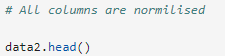

In [220]:
data2.head()

Open_Bid  High_Bid   Low_Bid  Close_Bid  Volume_Bid  Volume_Ask  \
0  0.929973  0.950626  0.928763   0.948125    0.105836    0.098566   
1  0.948125  0.960227  0.945987   0.958210    0.077881    0.108326   
2  0.960106  0.970311  0.958089   0.968899    0.121179    0.180303   
3  0.968899  0.972328  0.968294   0.971723    0.021689    0.074145   
4  0.971723  0.971723  0.967165   0.968375    0.072539    0.116962   

   Volume_Delta  Volume_Delta_abs  Open_Delta  High_Delta  Low_Delta  \
0      0.581480          0.011732    0.543708    0.420749   0.644573   
1      0.617291          0.049131    0.841499    0.774256   0.800192   
2      0.644522          0.095411    0.802113    0.750240   0.800192   
3      0.638191          0.084651    0.750240    0.759846   0.788665   
4      0.630563          0.071688    0.879923    0.805476   0.838617   

   Close_Delta Loca_time_T_Delta  New_day  New_week  Y_High_Bid  Y_Low_Ask  
0     0.716619               NaT        1         1    0.950626   0.945745  
1     0.747358   0 days 00:01:00        0         0    0.960227   0.956435  
2     0.755043   0 days 00:01:00        0         0    0.970311   0.968536  
3     0.870317   0 days 00:01:00        0         0    0.972328   0.979226  
4     0.771374   0 days 00:01:00        0         0    0.971723   0.975999

_____________________________

In [222]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16166 entries, 0 to 16165
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Open_Bid           16165 non-null  float64        
 1   High_Bid           16165 non-null  float64        
 2   Low_Bid            16165 non-null  float64        
 3   Close_Bid          16165 non-null  float64        
 4   Volume_Bid         16165 non-null  float64        
 5   Volume_Ask         16165 non-null  float64        
 6   Volume_Delta       16165 non-null  float64        
 7   Volume_Delta_abs   16165 non-null  float64        
 8   Open_Delta         16165 non-null  float64        
 9   High_Delta         16165 non-null  float64        
 10  Low_Delta          16165 non-null  float64        
 11  Close_Delta        16165 non-null  float64        
 12  Loca_time_T_Delta  16165 non-null  timedelta64[ns]
 13  New_day            16166 non-null  int64      

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [224]:
# memory size reduction

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



__________________________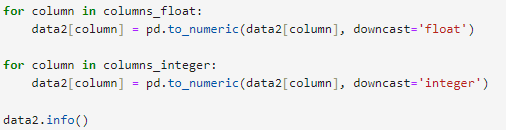

In [226]:
for column in columns_float:
    data2[column] = pd.to_numeric(data2[column], downcast = 'float')

for column in columns_integer:
    data2[column] = pd.to_numeric(data2[column], downcast= 'integer')

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16166 entries, 0 to 16165
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Open_Bid           16165 non-null  float32        
 1   High_Bid           16165 non-null  float32        
 2   Low_Bid            16165 non-null  float32        
 3   Close_Bid          16165 non-null  float32        
 4   Volume_Bid         16165 non-null  float32        
 5   Volume_Ask         16165 non-null  float32        
 6   Volume_Delta       16165 non-null  float32        
 7   Volume_Delta_abs   16165 non-null  float32        
 8   Open_Delta         16165 non-null  float32        
 9   High_Delta         16165 non-null  float32        
 10  Low_Delta          16165 non-null  float32        
 11  Close_Delta        16165 non-null  float32        
 12  Loca_time_T_Delta  16165 non-null  timedelta64[ns]
 13  New_day            16166 non-null  int8       

## <font color='green'>Save final dataset to file !</font>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [229]:
# Do it once!
# Writing a normalised dataset to disk in file GOLD_2020_normilised.csv

file_obj1 = open('GOLD_2022_normalised.csv', 'w')
data2.to_csv('GOLD_2022_normalised.csv', encoding='utf-8', index=False)
file_obj1.close()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Plot the price chart of the part of the whole dataset 'High_Bid' and 'Low_Bid' prices using iplot() library.
2) The start point should equal the 5 last digits of your SID Number.
3) The time period (in minutes) should equal the 3 last digits of your SID Number.
4) Please only add a print-screen of the required code and final graph to your Lab Logbook.
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK, AND UPLOAD THE LAB LOGBOOK REQUIREMENTS AS A SCREENSHOT OF YOUR CODE AND RESULT(S) ON YOUR GITHUB.
</h3> </html>

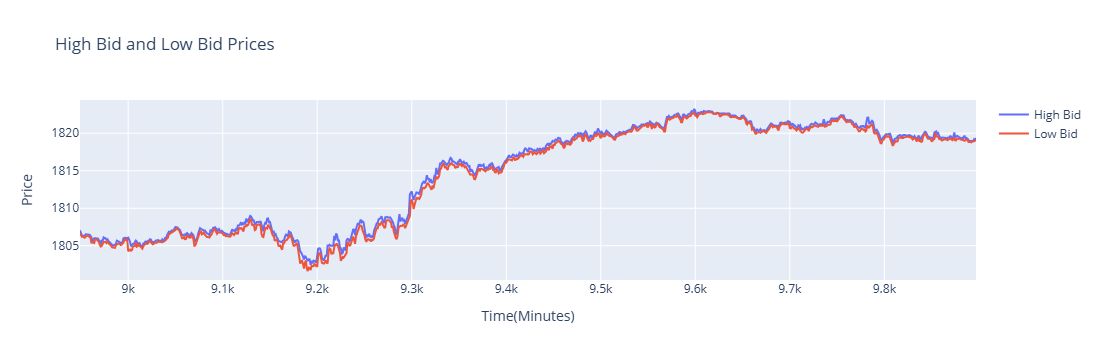

In [437]:
# The data only contains (16166 columns so the data with my SID is 58949 which is not possible to show so I have used 4 digit of my SID.)
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
start_row = 8949
period = 949
subset_df = df.iloc[start_row:start_row + period]
fig = go.Figure()
fig.add_trace(go.Scatter(x=subset_df.index, y=subset_df['High_Bid'],mode='lines',name='High Bid'))
fig.add_trace(go.Scatter(x=subset_df.index, y=subset_df['Low_Bid'],mode='lines',name='Low Bid'))
fig.update_layout(title='High Bid and Low Bid Prices', xaxis_title='Time(Minutes)',yaxis_title='Price')
iplot(fig)